### Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
- holiday - whether the day is considered a holiday  
- workingday - whether the day is neither a weekend nor holiday  
- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
- temp - temperature in Celsius  
- atemp - "feels like" temperature in Celsius  
- humidity - relative humidity  
- windspeed - wind speed  
- casual - number of non-registered user rentals initiated  
- registered - number of registered user rentals initiated  
- count - number of total rentals  

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
train.info()

In [ ]:
train.temp.describe()

In [ ]:
train.isnull().sum()

In [ ]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [ ]:
train.head(20)

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train.head()

In [ ]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,10)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)

ax1.set(ylabel='count', title='rental cnt by count')
ax2.set(xlabel='month', title='rental cnt by month')
ax3.set(xlabel='day', title='rental cnt by day')
ax4.set(xlabel='hour', title='rental cnt by hour')

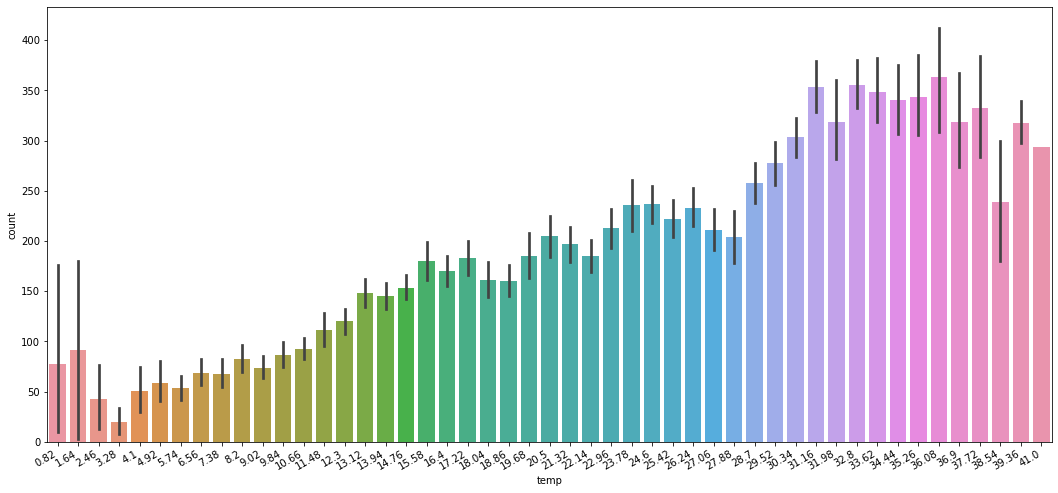

In [14]:
figure = plt.figure()
figure.set_size_inches(18, 8)
sns.barplot(data=train, x='temp', y='count')
plt.xticks(rotation=30, ha='right')
plt.show()